In [564]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from skimage import io, filters
import cv2
import math

path = '/Users/tae/Desktop/Project/image/2Grape_Black_rot/*'



In [571]:
def convert_gray(image):
    
    r = image[:,:,0]
    g = image[:,:,1]    
    b = image[:,:,2]
    
    
    gray = 0.2990 * r  + 0.5870 * g + 0.1140 * b
#     blurred_img = filters.median(gray , footprint=np.ones((3,3)))
    # gray = filters.median(gray ,footprint=np.ones((6,6)))

    
    
    plt.imshow(gray , cmap='gray')
    plt.colorbar()



    return gray


In [572]:
def graph_cut(img):
    


    # Create a mask
    mask = np.zeros(img.shape[:2],np.uint8)

    # Specify the background and foreground models
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    # Define the rectangle for initial segmentation (bounding box)
    rect = (3,3,img.shape[0],img.shape[1])



    # Apply grabCut algorithm
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

    # Create a mask where all the background and potential background pixels are 0
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    # Apply the mask to the original image
    img = img*mask2[:,:,np.newaxis]

    # Display the result
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.colorbar()
#     plt.show()
    
    return img

In [573]:


def view_graph(value):
    print('First value:', len(value))
    min_p = 4
    max_p = 10
    lists = []
    box = []
    
    total_list = []
    
    
    for rounds in [10,8,6,4,3,2]:
        
        
        
        for i in value:
            if len(box) == 0 or box[-1] != i:
                if len(box) > rounds:
                   
                    lists.append(box[0])
                    box = []
                else:
                    lists.extend(box)
                    box = []
                box.extend([i]) 
            else:
                box.extend([i])
                
        value = lists
        total_list.append(lists)
        
        lists = []
        print('Round:',rounds, len(value) )
        
    return total_list


In [580]:
def extract(image):
    coordinate = []
    value = []
    real_value = []
    for height in  range(image.shape[0]):
        for width in range(image.shape[1]):
            real_value.append((image[height,width]))
            if image[height,width] !=0:
                coordinate.append((height , width))
                value.append((image[height,width]))
           
    return np.round(value) , coordinate
        




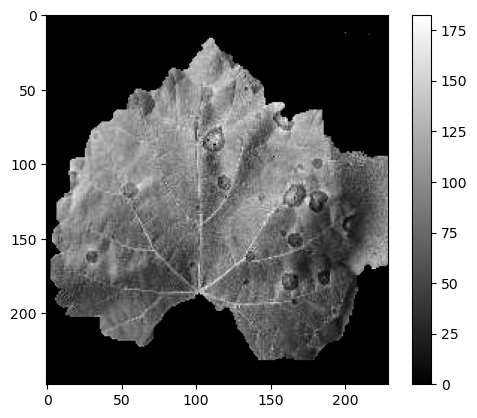

In [589]:
image_rgb = graph_cut(plt.imread(glob.glob(path)[50]))
image_gray = convert_gray(image_rgb)
value , index = extract(image_gray)


<Figure size 1600x800 with 0 Axes>

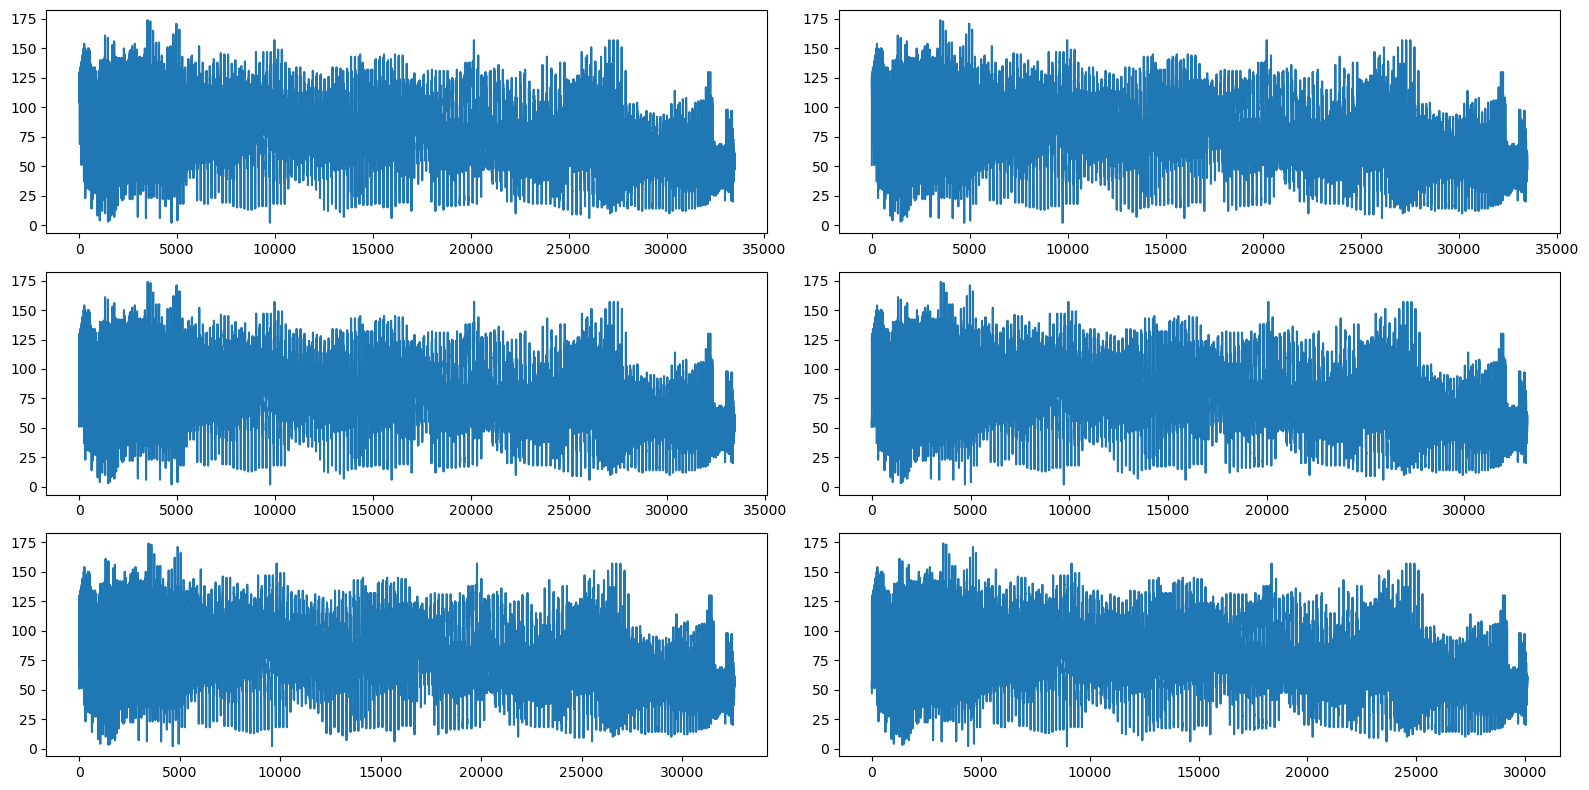

In [542]:
plt.figure(figsize=(16,8))


num_subplots = len(total_list)
num_cols = 2
num_rows = (num_subplots + num_cols - 1) // num_cols  # คำนวณจำนวนแถว

plt.figure(figsize=(16, 8))

for i, data in enumerate(total_list, start=1):
    plt.subplot(num_rows, num_cols, i)
    plt.plot(data)

plt.tight_layout()
plt.show()



In [615]:
values = np.array(value)
indexs = np.array(index)



values = values.reshape((-1, 1))


result = np.concatenate((values, indexs), axis=1)
print(result)


[[ 75.  12. 200.]
 [ 57.  13. 216.]
 [141.  16. 109.]
 ...
 [ 29. 231. 177.]
 [ 29. 231. 178.]
 [ 45. 231. 179.]]


In [610]:
df = pd.DataFrame(result,  columns=['Value','x','y'])


path = '/Users/tae/Desktop/Project/Dataset2/value_index.xlsx'
df.to_excel(path , index=False)